## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the dataset

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Python/Lab/Lab 6/bank.csv")
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3481,3482,15644686,Kennedy,729,Spain,Female,34,9,53299.96,2,1,1,42855.97,0
6038,6039,15700964,Pollard,624,Germany,Female,27,7,104848.68,1,1,1,167387.36,0
3323,3324,15740630,Pisano,487,Spain,Female,31,1,0.00,2,1,0,158750.13,0
3930,3931,15626008,Miller,622,Germany,Female,52,9,111973.97,1,1,1,162756.29,1
9347,9348,15802809,Vidal,660,Spain,Female,36,0,84438.57,1,1,1,181449.51,0
3685,3686,15642137,Fang,695,Spain,Female,39,5,0.00,2,0,0,102763.69,0
1914,1915,15741554,Streeter,746,Spain,Male,31,2,113836.27,1,1,1,174815.54,0
5942,5943,15695339,Lucchesi,517,Germany,Male,53,0,109172.88,1,1,0,54676.10,1
5336,5337,15700460,Allnutt,530,France,Female,55,4,120905.03,1,0,1,123475.88,1
6506,6507,15702095,Clarke,585,Spain,Female,56,1,128472.80,1,1,0,186476.91,1


## Drop the unnecessary columns

In [5]:
data.drop(columns=['RowNumber', 'CustomerId','Surname'], inplace=True)
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2766,705,France,Male,30,1,0.00,1,1,1,181300.32,0
3999,696,France,Male,19,1,110928.51,1,1,1,2766.63,0
6916,654,France,Female,24,8,145081.73,1,1,1,130075.07,0
3705,612,France,Female,35,3,0.00,1,1,1,48108.72,0
2923,705,Germany,Male,41,4,72252.64,2,1,1,142514.66,0


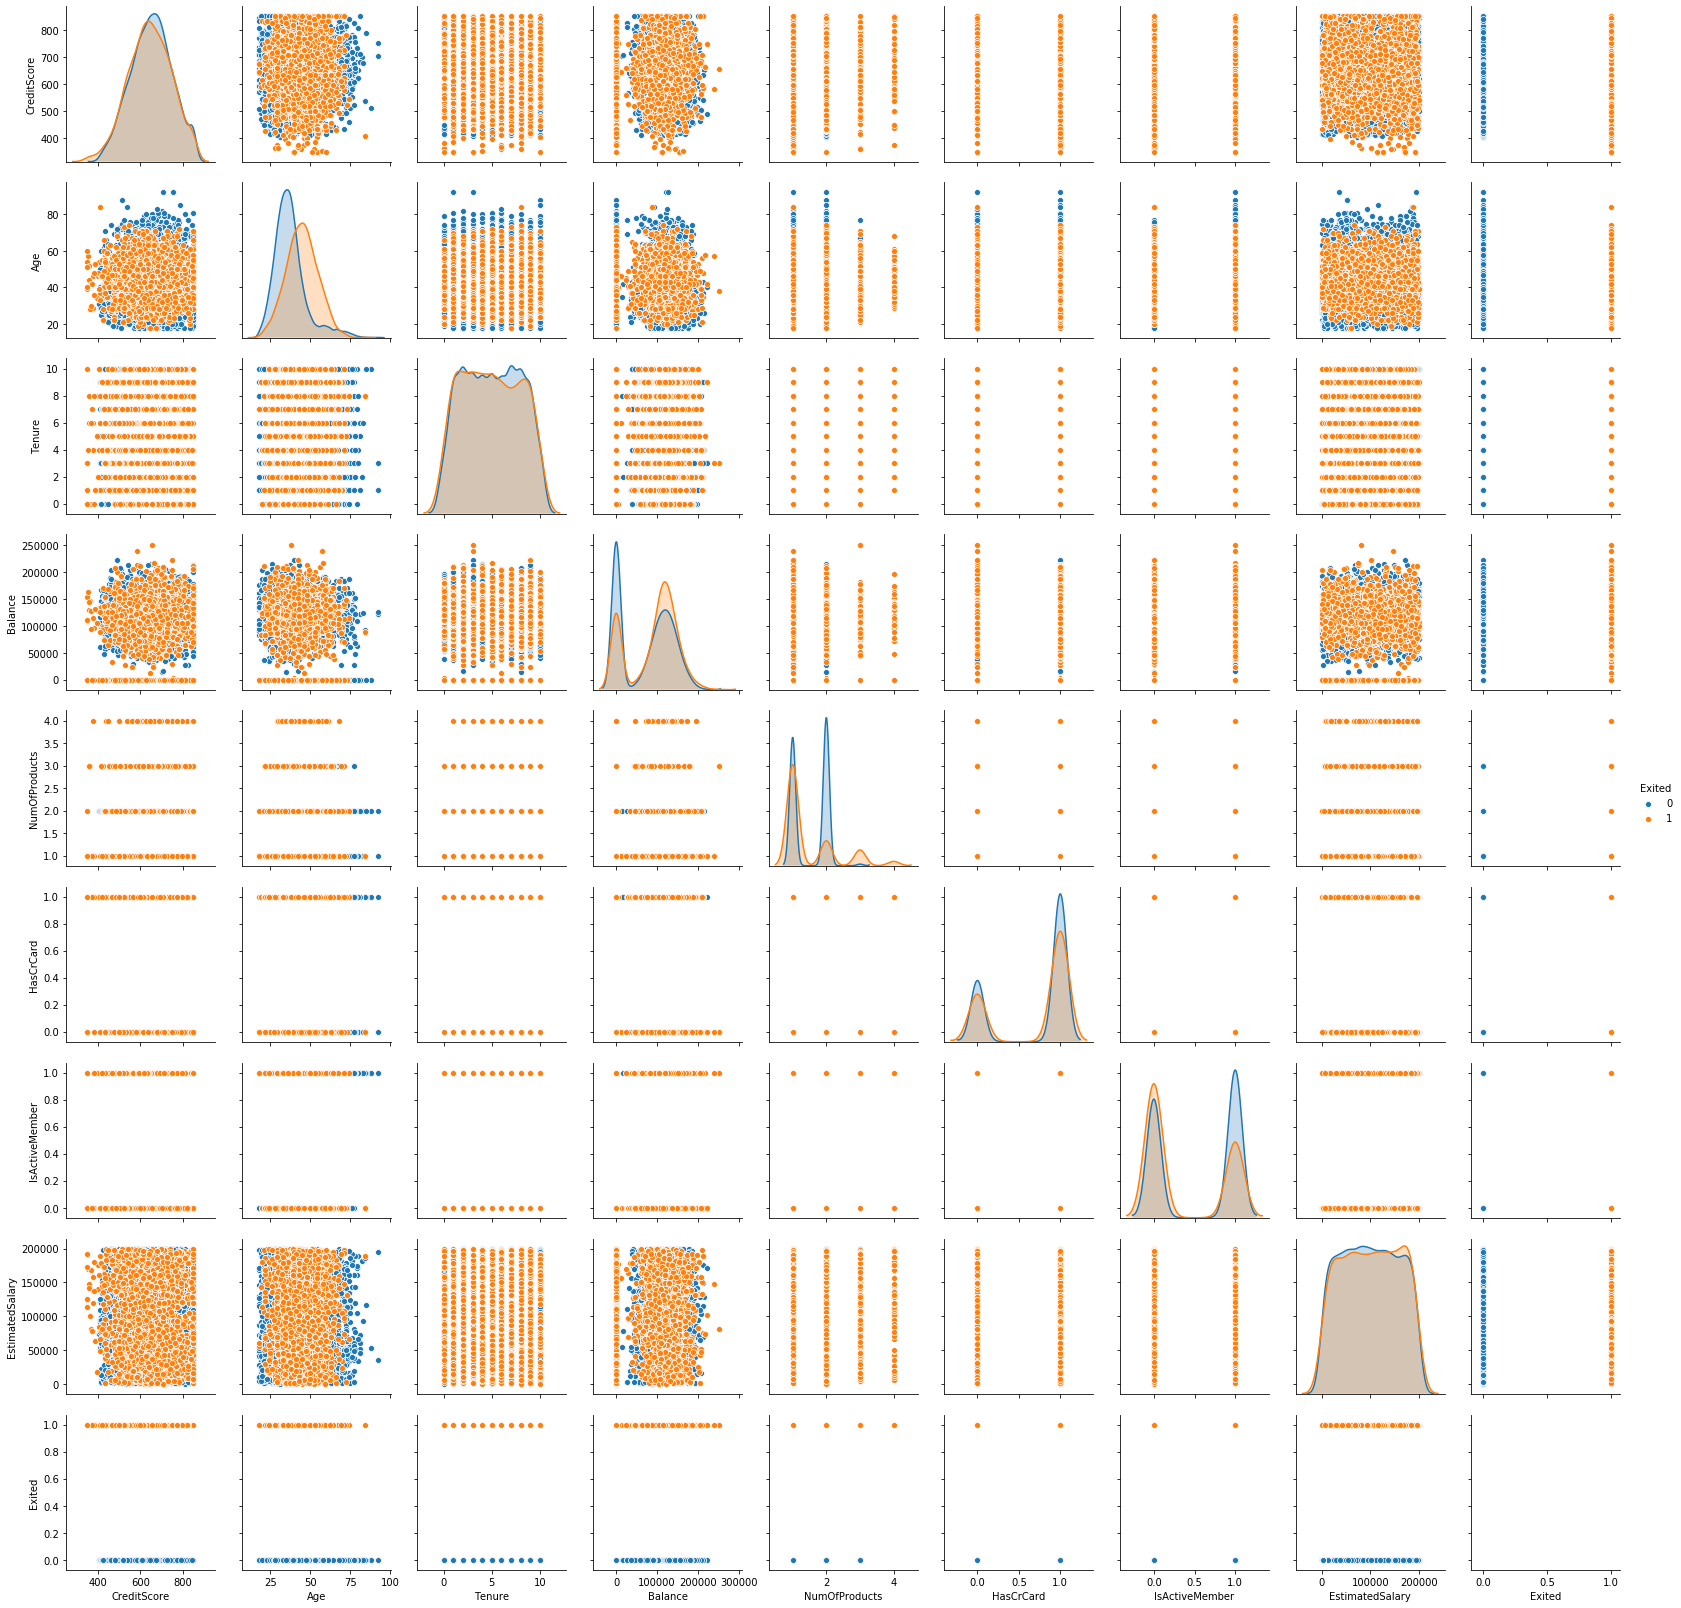

In [6]:
sns.pairplot(data, hue="Exited")

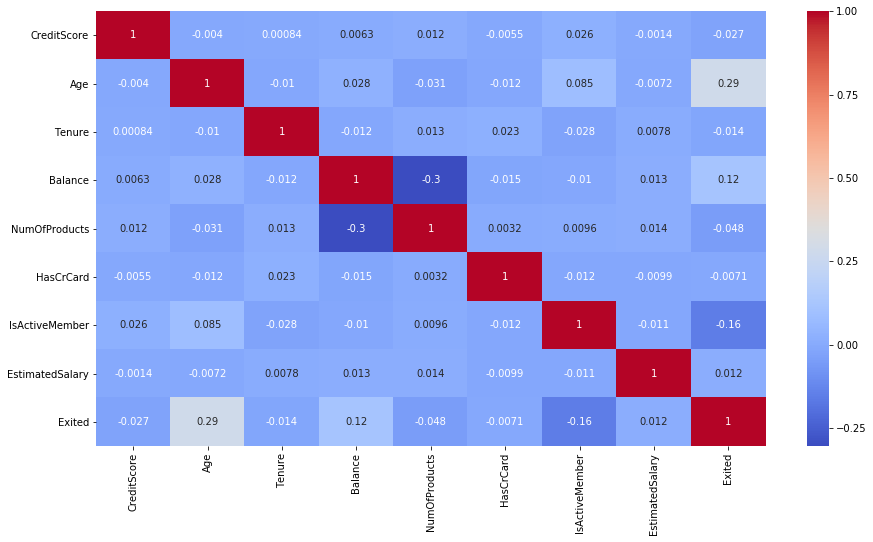

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

From above graph it is clear that the co-relation between almost all the features is very weak. So we must drop the feature which have worst co relation and also contain repeatative information. Still we try to find some passive relation between features using exploratory data analysis.

## Exploratory Data Analysis

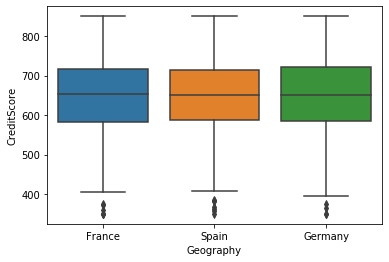

In [8]:
sns.boxplot(x='Geography', y='CreditScore', data=data)

According to **Geography** the credit score range fall in almost same range by it's mean value.

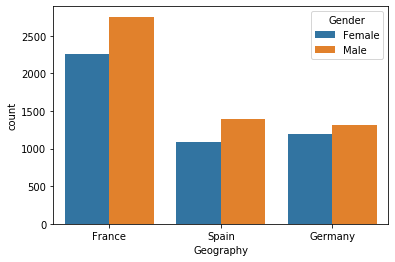

In [9]:
sns.countplot(x='Geography', hue='Gender', data=data)

This graph indicates that **France** has more population than **Spain** and **Germany**.

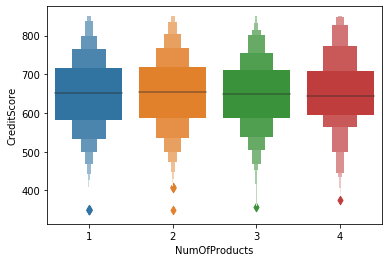

In [10]:
sns.boxenplot(x='NumOfProducts', y='CreditScore', data=data)

The **Credit Score** does not changes with the **No. of Products**.

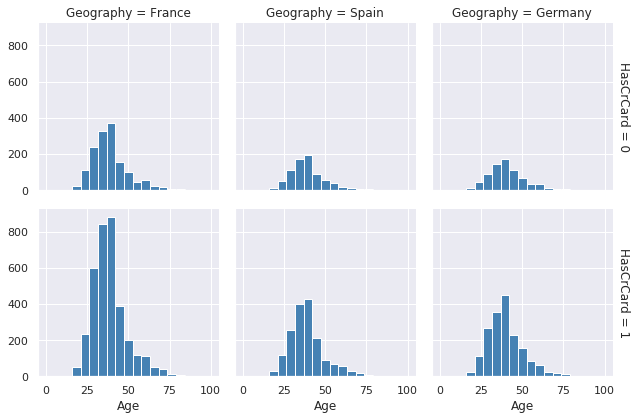

In [11]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="HasCrCard", col="Geography", margin_titles=True)
bins = np.linspace(0, 100, 20)
g.map(plt.hist, "Age", color="steelblue", bins=bins)

The count of customers who are using **Credit Card** is more than the non-users. Specially **France** has more credit card users in the range of age between **25** to **50** . So it is technically important feature that indicate the slight tendency that customers from **France** and having **age between 25 to 50 years** will not leave the bank.

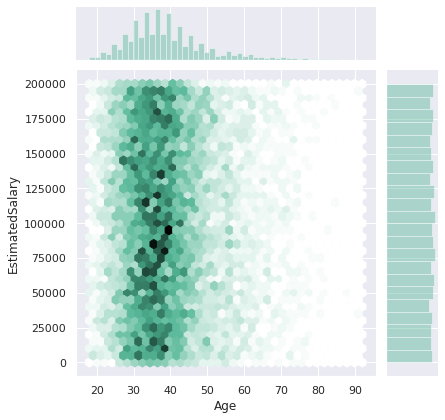

In [12]:
sns.jointplot(x="Age" , y="EstimatedSalary", kind="hex", color="#4CB391", data=data)

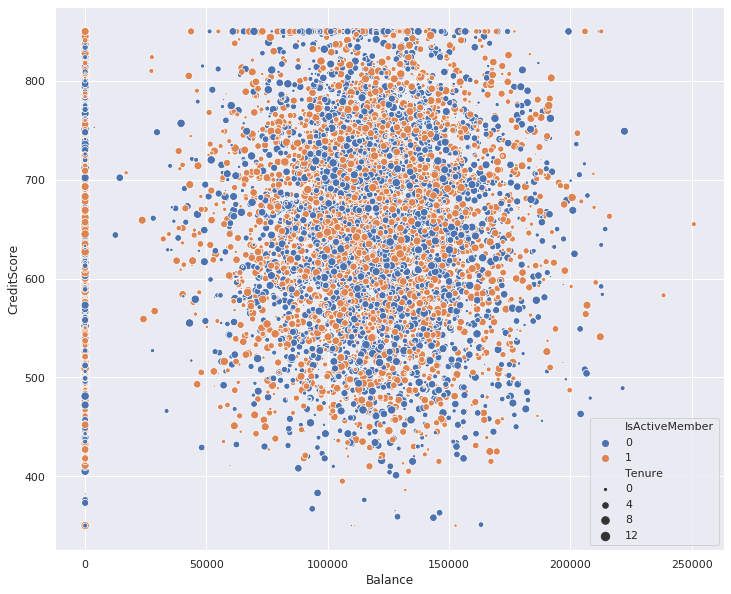

In [13]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Balance", y="CreditScore", hue="IsActiveMember", size="Tenure", cmap='#bcbd22', sizes=(5, 70), data=data)

## Data Preprocessing

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [15]:
data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9753,656,68,7,153545.11,1,1,1,186574.68,0,1,0,1
9081,736,54,7,111729.47,2,0,1,84920.49,0,0,0,1
3309,523,28,2,121164.11,1,1,1,59938.81,0,0,0,0
6662,665,36,1,0.00,2,0,1,121505.61,0,0,0,1
9894,521,77,6,0.00,2,1,1,49054.10,0,0,0,0


In [16]:
data.shape

(10000, 12)

In [17]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [18]:
data.shape

(10000, 12)

## Distinguish the feature and target set

In [ ]:
X = data.drop(columns="Exited", axis=1)
y = data["Exited"]

## Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.30,random_state=2)

In [ ]:
import numpy as np
train_x =np.array(train_x).astype('float32')
test_x = np.array(test_x).astype('float32')
train_y =np.array(train_y).astype('float32')
test_y = np.array(test_y).astype('float32')

## Normalize the data

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
train_x = transformer.fit_transform(train_x)
test_x = transformer.transform(test_x)

In [ ]:
#Convert labels to one hot encoding
train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [24]:
train_x.shape

(7000, 11)

In [25]:
train_y.shape

(7000, 2)

In [26]:
test_x.shape

(3000, 11)

## Build the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(BatchNormalization())

In [ ]:
#Add 1st hidden layer
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())

In [ ]:
#Add 2nd hidden layer
model.add(Dense(100, activation='relu'))

In [ ]:
#Add OUTPUT layer
model.add(Dense(2, activation='softmax'))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=30)

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 4s 554us/sample - loss: 0.5532 - accuracy: 0.7781 - val_loss: 0.5713 - val_accuracy: 0.8050
Epoch 2/10
7000/7000 [==============================] - 1s 167us/sample - loss: 0.5182 - accuracy: 0.7907 - val_loss: 0.4886 - val_accuracy: 0.8050
Epoch 3/10
7000/7000 [==============================] - 1s 165us/sample - loss: 0.5147 - accuracy: 0.7911 - val_loss: 0.5100 - val_accuracy: 0.8050
Epoch 4/10
7000/7000 [==============================] - 1s 166us/sample - loss: 0.5127 - accuracy: 0.7899 - val_loss: 0.5073 - val_accuracy: 0.8050
Epoch 5/10
7000/7000 [==============================] - 1s 166us/sample - loss: 0.5160 - accuracy: 0.7866 - val_loss: 0.5133 - val_accuracy: 0.8043
Epoch 6/10
7000/7000 [==============================] - 1s 166us/sample - loss: 0.5110 - accuracy: 0.7911 - val_loss: 0.5018 - val_accuracy: 0.8050
Epoch 7/10
7000/7000 [==============================] - 1s 166us

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  44        
_________________________________________________________________
dense (Dense)                multiple                  2400      
_________________________________________________________________
batch_normalization_1 (Batch multiple                  800       
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
dense_2 (Dense)              multiple                  202       
Total params: 23,546
Trainable params: 23,124
Non-trainable params: 422
_________________________________________________________________


## Predict the results

In [ ]:
y_pred = (model.predict_proba(test_x)[:,:] >= 0.5).astype(int)

In [ ]:
y_pred = np.array(y_pred).astype('float32')

## Accuracy Score and Confusion Matrix

In [37]:
from sklearn import metrics
accuracy = metrics.accuracy_score(test_y,y_pred)
print(accuracy*100,'%')

80.5 %


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))

array([[2415,    0],
       [ 585,    0]])